In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
df = pd.read_csv('D:\\superstore_sales_analysis/Data/superstore.csv',encoding='latin1')

In [83]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# 1. Data Understanding and Preparation

#### 1.1 Data Exploration

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

<Axes: >

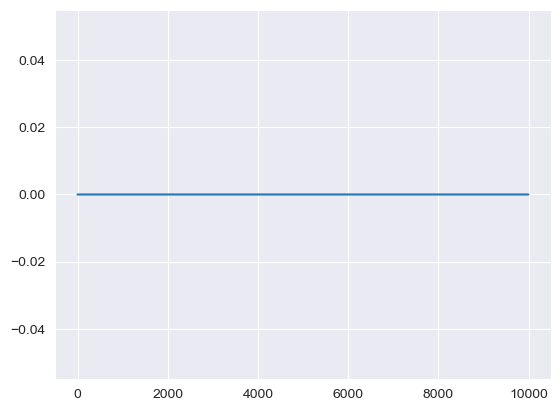

In [85]:
df.isnull().sum(axis=1).plot()

No Null values

<Axes: >

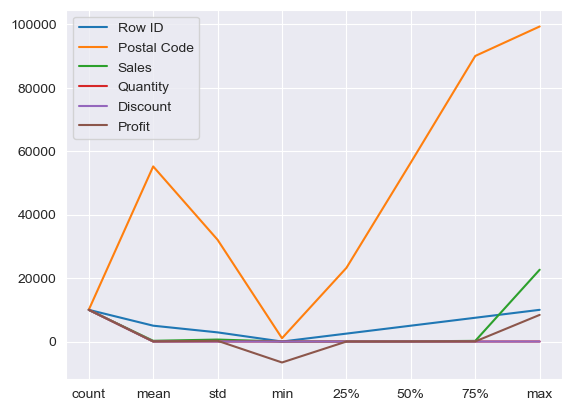

In [86]:
df.describe().plot()

#### Profit has negative value

In [87]:
negative_profit_mask = df['Profit'] < 0

negative_profits = df[negative_profit_mask]
negative_profits['Profit']


3       -383.0310
14      -123.8580
15        -3.8160
23        -1.0196
27     -1665.0522
          ...    
9920     -35.8176
9921      -4.5936
9931     -40.1960
9937      -1.7772
9962     -67.6704
Name: Profit, Length: 1871, dtype: float64

In [88]:
num_negative_profits = negative_profit_mask.sum()
total_series = len(df)
percentage_negative_profits = (num_negative_profits / total_series) * 100

print(f"\nNumber of Negative Profit Entries: {num_negative_profits}")
print(f"Total Number of Entries: {total_series}")
print(f'Percentage Negative Profits: {percentage_negative_profits:.2f}%')


Number of Negative Profit Entries: 1871
Total Number of Entries: 9994
Percentage Negative Profits: 18.72%


### Further analysis for checking the reason for negative Profit

In [89]:
# Discount Percentage 
negative_profits['Discount_Percentage'] = (df['Discount'] / df['Sales']) * 100

avg_discount_neg = negative_profits['Discount_Percentage'].mean()
print(f"\nAverage Discount Percentage for Negative Profits: {avg_discount_neg:.2f}%")


Average Discount Percentage for Negative Profits: 5.53%


C:\Users\SOULS\AppData\Local\Temp\ipykernel_12712\2782112406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_profits['Discount_Percentage'] = (df['Discount'] / df['Sales']) * 100


In [90]:
# Profit Margin
negative_profits['profit_margin'] = (df['Profit'] /df['Sales']) * 100

avg_profit_neg = negative_profits['profit_margin'].mean()

print(f"\nAverage Profit Margin for Negative Profits: {avg_profit_neg:.2f}%")


Average Profit Margin for Negative Profits: -62.46%


C:\Users\SOULS\AppData\Local\Temp\ipykernel_12712\1862383723.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_profits['profit_margin'] = (df['Profit'] /df['Sales']) * 100


##### For every dollar sales in these transactions, the business is incurring a loss of approximately 69.49 cents.

In [91]:
avg_profit_neg = df['profit_margin'].mean()

print(f"\nAverage Profit Margin for Negative Profits: {avg_profit_neg:.2f}%")

KeyError: 'profit_margin'

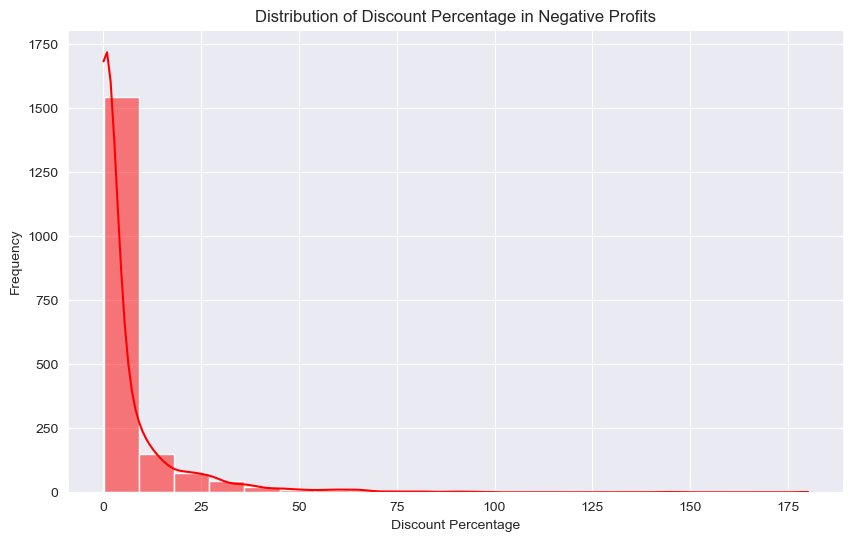

In [92]:
plt.figure(figsize=(10, 6))
sns.histplot(negative_profits['Discount_Percentage'], bins=20, kde=True, color='red')
plt.title('Distribution of Discount Percentage in Negative Profits')
plt.xlabel('Discount Percentage')
plt.ylabel('Frequency')
plt.show()

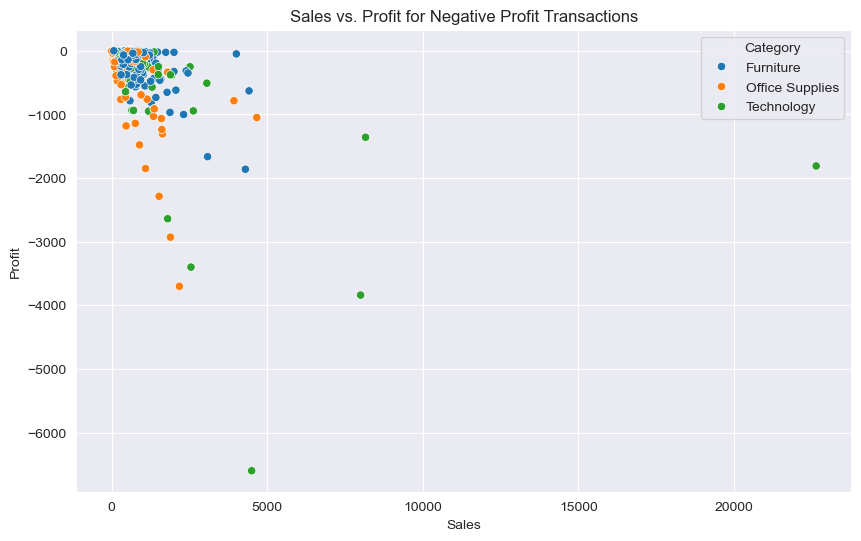

In [93]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', data=negative_profits, hue='Category')
plt.title('Sales vs. Profit for Negative Profit Transactions')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()


In [94]:
# Identifying if high discounts correlated with negative profits.

high_discounts_neg = negative_profits[negative_profits['Discount_Percentage'] > 20]
print(f"\nNumber of Negative Profits with >20% Discounts: {len(high_discounts_neg)} ")
print(high_discounts_neg[['Order ID', 'Sales', 'Discount_Percentage', 'Profit']])


Number of Negative Profits with >20% Discounts: 164 
            Order ID  Sales  Discount_Percentage  Profit
15    US-2015-118983  2.544            31.446541 -3.8160
75    US-2017-118038  1.248            64.102564 -1.9344
101   CA-2016-158568  1.788            44.742729 -3.0396
126   US-2017-107272  2.388            29.313233 -1.8308
198   US-2017-124303  2.946            23.761032 -2.2586
...              ...    ...                  ...     ...
9479  CA-2014-126193  3.828            20.898642 -6.5076
9629  CA-2014-118192  3.438            20.360675 -2.5212
9795  CA-2016-125920  3.798            21.063718 -5.8869
9808  CA-2017-145093  2.112            37.878788 -3.3792
9869  CA-2014-114195  3.132            22.349936 -2.6100

[164 rows x 4 columns]


In [95]:
low_sales_neg = negative_profits[negative_profits['Sales'] < 50]  # Example threshold
print(f"\nNumber of Negative Profits with Sales < $50: {len(low_sales_neg)}")
print(low_sales_neg[['Order ID', 'Sales', 'Profit']])


Number of Negative Profits with Sales < $50: 829
            Order ID   Sales   Profit
15    US-2015-118983   2.544  -3.8160
28    US-2015-150630   9.618  -7.0532
32    US-2015-150630   6.858  -5.7150
75    US-2017-118038   1.248  -1.9344
76    US-2017-118038   9.708  -5.8248
...              ...     ...      ...
9870  CA-2014-114195  22.428 -17.9424
9877  US-2017-166324   8.700  -6.3800
9903  CA-2014-122609  25.128  -6.9102
9920  CA-2016-149272  22.386 -35.8176
9921  CA-2014-111360   5.742  -4.5936

[829 rows x 3 columns]


In [96]:
# Checking if certain categories or products are consistently generating negative profits
category_neg = negative_profits['Category'].value_counts()
print("\nNegative Profit by category: ")
print(category_neg)

product_neg = negative_profits['Product Name'].value_counts().head(10)
print("\n Top 10 Products with Negative Profit: ")
print(product_neg)


Negative Profit by category: 
Category
Office Supplies    886
Furniture          714
Technology         271
Name: count, dtype: int64

 Top 10 Products with Negative Profit: 
Product Name
Global Wood Trimmed Manager's Task Chair, Khaki                          12
KI Adjustable-Height Table                                               10
Global High-Back Leather Tilter, Burgundy                                10
Hon 61000 Series Interactive Training Tables                              9
Office Star - Contemporary Task Swivel chair with Loop Arms, Charcoal     8
Storex Dura Pro Binders                                                   8
Global Deluxe Steno Chair                                                 8
GBC Instant Report Kit                                                    8
Novimex Fabric Task Chair                                                 8
Staple remover                                                            8
Name: count, dtype: int64


In [97]:
# Analyzing if specific shipping modes are associated with negative profits.
shipping_neg = negative_profits['Ship Mode'].value_counts()
print("\nNegative Profit by Ship Mode:")
print(shipping_neg)


Negative Profit by Ship Mode:
Ship Mode
Standard Class    1173
Second Class       307
First Class        293
Same Day            98
Name: count, dtype: int64


In [98]:
# Investigation if certain regions are more prone to negative profit.

region_neg = negative_profits['Region'].value_counts()
print("\nNegative Profit by Region: ")
print(region_neg)


Negative Profit by Region: 
Region
Central    741
East       553
West       318
South      259
Name: count, dtype: int64


In [99]:
# Display a sample of negative profit transactions
sample_neg = negative_profits.sample(n=5, random_state=42)
print("\nSample Negative Profit Transactions:")
print(sample_neg)



Sample Negative Profit Transactions:
      Row ID        Order ID Order Date   Ship Date       Ship Mode  \
9103    9104  CA-2015-163181  11/7/2015  11/12/2015  Standard Class   
6767    6768  CA-2017-100615  4/20/2017   4/24/2017  Standard Class   
9937    9938  CA-2016-164889   6/3/2016    6/6/2016    Second Class   
1463    1464  CA-2016-152289  8/26/2016   8/28/2016     First Class   
2228    2229  CA-2016-139157  10/1/2016   10/5/2016  Standard Class   

     Customer ID   Customer Name    Segment        Country           City  \
9103    AB-10105   Adrian Barton   Consumer  United States        Houston   
6767    SJ-20215    Sarah Jordon   Consumer  United States        Chicago   
9937    CP-12340  Christine Phan  Corporate  United States    Los Angeles   
1463    LC-16930  Linda Cazamias  Corporate  United States       Pasadena   
2228    GM-14680   Greg Matthias   Consumer  United States  New York City   

      ...       Product ID   Category Sub-Category  \
9103  ...  FUR-FU-

Overall, the discount percentage (5.53%) and steep negative profit margin (-62.49%).


#### 1.2 Data Cleaning 

In [100]:
# Dropping Row ID
df = df.drop(columns=['Row ID'])

In [101]:
# Checking for Duplicates 
if df.duplicated().sum() > 0:
    print('Duplicate exits')
else:
    print("No duplicates")

Duplicate exits


In [102]:
duplicates = df[df.duplicated(keep=False)]
duplicates

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3405,US-2014-150119,4/23/2014,4/27/2014,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588
3406,US-2014-150119,4/23/2014,4/27/2014,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588


In [103]:
# Dropping Duplicate row
df.drop_duplicates(inplace=True)

###### Converting Data Types

In [104]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
#df['Customer ID'] = df['Customer ID'].astype('category')

#### 1.3 Feature Engineering
* Creating New Feature : Order Year and Month

In [105]:
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month

* Total Revenue 

In [106]:
df['Total Revenue'] = df['Sales'] - df['Discount']

* Calculating Customer Lifetime Value (CLV)

In [107]:
# Calculate customer lifespan
def calculate_average_lifespan(df):
    lifespan = df.groupby('Customer ID')['Order Date'].agg(['min', 'max'])
    lifespan['Lifespan (days)'] = (lifespan['max'] - lifespan['min']).dt.days
    average_lifespan = lifespan['Lifespan (days)'].mean()
    average_lifespan_years = average_lifespan / 365  
    return average_lifespan_years

ave_lifespan = calculate_average_lifespan(df)
print(f"\nAverage Lifespan: {ave_lifespan:.2f} years")


Average Lifespan: 2.74 years


In [108]:
avg_order_value = df.groupby('Customer ID')['Total Revenue'].mean()
purchase_frequency = df.groupby('Customer ID')['Order ID'].count()
customer_lifespan = 2.74

clv = avg_order_value * purchase_frequency * customer_lifespan
clv = clv.rename('CLV')
df = df.merge(clv, on='Customer ID', how='left')

In [110]:
df.head(10)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Year,Order Month,Total Revenue,CLV
0,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,261.9600,3144.91720
1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,731.9400,3144.91720
2,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,14.6200,3063.13642
3,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,957.1275,7125.43987
4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,22.1680,7125.43987
5,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694,2014,6,48.8600,17127.60574
6,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,Art,Newell 322,7.2800,4,0.00,1.9656,2014,6,7.2800,17127.60574
7,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152,2014,6,906.9520,17127.60574
8,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825,2014,6,18.3040,17127.60574
9,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700,2014,6,114.9000,17127.60574


# 2. Exploratory Analysis

In [111]:
# Types of customers
types_of_customers = df['Segment'].unique()
print(types_of_customers)

['Consumer' 'Corporate' 'Home Office']


In [112]:
number_of_customers = df['Segment'].value_counts().reset_index()
number_of_customers = number_of_customers.rename(columns={'Segment': 'Type of Customers'})

In [113]:
print(number_of_customers)

  Type of Customers  count
0          Consumer   5191
1         Corporate   3020
2       Home Office   1782


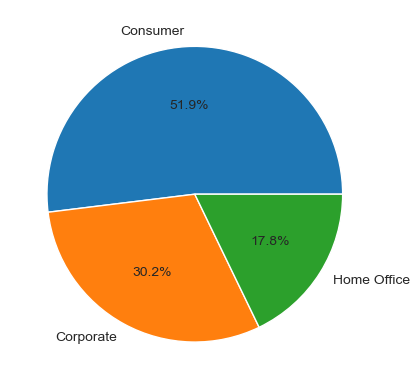

In [114]:
plt.pie(number_of_customers['count'], labels=number_of_customers['Type of Customers'], autopct='%1.1f%%');

* Customer acquisation cost (CAC) - How much does it cost to have a customer in each segment
* How satisfied a customer is in each segment
* Churn Rate 
* Customer segmentation model
* Total sales for each customer type
* Total sales for each segment
* Calculate CLV for each segment to identify which segment generates more Revenue over time 
* ROI

  Type Of Customer   Total Sales
0         Consumer  1.161401e+06
1        Corporate  7.061464e+05
2      Home Office  4.296531e+05


<BarContainer object of 3 artists>

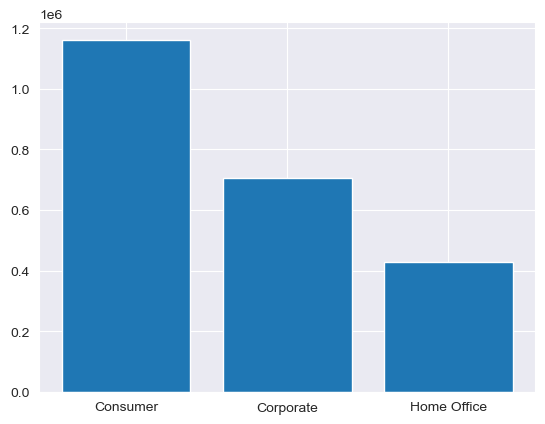

In [18]:
sales_per_segment = df.groupby('Segment')['Sales'].sum().reset_index()
sales_per_segment = sales_per_segment.rename(columns={'Segment': 'Type Of Customer','Sales': 'Total Sales'})

print(sales_per_segment)
plt.bar(sales_per_segment['Type Of Customer'], sales_per_segment['Total Sales'])

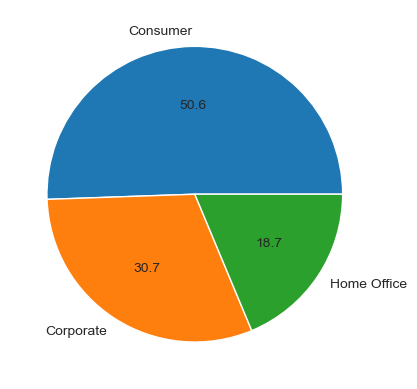

In [19]:
plt.pie(sales_per_segment['Total Sales'], labels=sales_per_segment['Type Of Customer'], autopct='%1.1f');

In [123]:
customers_CLV = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['CLV'].sum().reset_index()
print(customers_CLV.head())

  Customer ID  Customer Name   Segment           CLV
0    AA-10315     Alex Avila  Consumer  167655.55840
1    AA-10375   Allen Armold  Consumer   43368.30900
2    AA-10480   Andrew Allen  Consumer   58865.45856
3    AA-10645  Anna Andreadi  Consumer  250830.91620
4    AB-10015  Aaron Bergman  Consumer   14561.82864


In [124]:
customers_CLV.rename(columns={'CLV': 'Total CLV'}, inplace =True)

In [125]:
customer_high_clv = customers_CLV.sort_values(by='Total CLV', ascending=False)
print(customer_high_clv.head())

    Customer ID Customer Name      Segment     Total CLV
434    KL-16645  Ken Lonsdale     Consumer  1.125903e+06
700    SM-20320   Sean Miller  Home Office  1.029117e+06
720    SV-20365   Seth Vernon     Consumer  1.005334e+06
311    GT-14710     Greg Tran     Consumer  9.389963e+05
387    JL-15835      John Lee     Consumer  9.126813e+05


* These are the customers with highest CLV. 

### Customer Loyalty

* Is Revenue increasing or decreasing by keeping the Loyal customers.
* 30 most Loyal customer using CLV. 

In [151]:
customers_order_frequency = df.groupby(['Customer ID', 'Customer Name', 'Segment', 'CLV'])['Order ID'].count().reset_index()
print(customers_order_frequency.head(5))

  Customer ID  Customer Name   Segment          CLV  Order ID
0    AA-10315     Alex Avila  Consumer  15241.41440        11
1    AA-10375   Allen Armold  Consumer   2891.22060        15
2    AA-10480   Andrew Allen  Consumer   4905.45488        12
3    AA-10645  Anna Andreadi  Consumer  13935.05090        18
4    AB-10015  Aaron Bergman  Consumer   2426.97144         6


In [152]:
customers_order_frequency.rename(columns={'Order ID': 'Total Orders'}, inplace=True)
print(customers_order_frequency.head())

  Customer ID  Customer Name   Segment          CLV  Total Orders
0    AA-10315     Alex Avila  Consumer  15241.41440            11
1    AA-10375   Allen Armold  Consumer   2891.22060            15
2    AA-10480   Andrew Allen  Consumer   4905.45488            12
3    AA-10645  Anna Andreadi  Consumer  13935.05090            18
4    AB-10015  Aaron Bergman  Consumer   2426.97144             6


In [153]:
repeat_customers = customers_order_frequency[customers_order_frequency['Total Orders'] >=1]
print(repeat_customers.tail())

    Customer ID       Customer Name    Segment          CLV  Total Orders
788    XP-21865        Xylona Preis   Consumer   6503.00092            28
789    YC-21895      Yoseph Carroll  Corporate  14943.27500             8
790    YS-21880       Yana Sorensen  Corporate  18412.37256            12
791    ZC-21910    Zuschuss Carroll   Consumer  21968.79118            31
792    ZD-21925  Zuschuss Donatelli   Consumer   4090.66656             9


In [154]:
repeat_customers_sorted = repeat_customers.sort_values(by='Total Orders', ascending = False)
print(repeat_customers_sorted.head(30))

    Customer ID        Customer Name      Segment           CLV  Total Orders
787    WB-21850        William Brown     Consumer  16857.855480            37
606    PP-18955           Paul Prost  Home Office  19862.007920            34
387    JL-15835             John Lee     Consumer  26843.569020            34
482    MA-17560         Matt Abelman  Home Office  11770.933140            34
720    SV-20365          Seth Vernon     Consumer  31416.703000            32
349    JD-15895     Jonathan Doherty    Corporate  20847.191360            32
147    CK-12205  Chloris Kastensmidt     Consumer   8623.752700            32
257    EH-13765         Edward Hooks    Corporate  28245.509200            32
275    EP-13915           Emily Phan     Consumer  14993.117792            31
791    ZC-21910     Zuschuss Carroll     Consumer  21968.791180            31
44     AP-10915       Arthur Prichep     Consumer   9098.597440            31
450    LC-16870        Lena Cacioppo     Consumer   7051.400960 

#### Loyalty Score

In [150]:
# Calculating Loyalty metrics

loyalty_data = df.groupby('Customer ID').agg(purchase_frequency=('Order ID', 'count'),
                                             last_order_date=('Order Date', 'max'),
                                             total_revenue=('Total Revenue', 'sum')).reset_index()

# Calculating Recency in days
max_order_date = df['Order Date'].max()
loyalty_data['Recency'] = (max_order_date - loyalty_data['last_order_date']).dt.days

# Defining Loyalty score
loyalty_data['loyalty_score'] = (
    loyalty_data['purchase_frequency'] * (1 / (loyalty_data['Recency'] + 1)) +
    loyalty_data['total_revenue'] * 0.1
)

# Getting to 30 loyal customers 

top_loyal_customers = loyalty_data.nlargest(100, 'loyalty_score')

# Calculating their revenue contribution

total_loyal_revenue = top_loyal_customers['total_revenue'].sum()
overall_revenue = df['Total Revenue'].sum()
loyalty_contribution_percentage = (total_loyal_revenue / overall_revenue) * 100 
print(loyalty_contribution_percentage)

35.839704051888496


In [143]:
# Count the number of top loyal customers contributing to the 15% revenue
total_customers = df['Customer ID'].nunique()
print(total_customers)

793


In [144]:
contribution_ratio = 30 / total_customers
print(contribution_ratio)

0.03783102143757881


In [147]:
df['Customer ID'].nunique()

793